In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 10)

import os
import warnings
warnings.filterwarnings('ignore')

# Import du dataset

In [2]:
telco = pd.read_csv('telco_customer_churn.csv')
telco_raw = telco.copy()
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
telco.isin([' ']).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [34]:
telco.columns = telco.columns.str.lower()
telco.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

# Data preprocessing

In [35]:
preproc = telco.copy()

In [37]:
# drop customerid
preproc = preproc.drop('customerid', axis=1)

In [39]:
for feature in preproc.columns:
    print(feature, ':', preproc[feature].nunique(), '/', preproc[feature].unique())

gender : 2 / ['Female' 'Male']
seniorcitizen : 2 / [0 1]
partner : 2 / ['Yes' 'No']
dependents : 2 / ['No' 'Yes']
tenure : 73 / [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phoneservice : 2 / ['No' 'Yes']
multiplelines : 3 / ['No phone service' 'No' 'Yes']
internetservice : 3 / ['DSL' 'Fiber optic' 'No']
onlinesecurity : 3 / ['No' 'Yes' 'No internet service']
onlinebackup : 3 / ['Yes' 'No' 'No internet service']
deviceprotection : 3 / ['No' 'Yes' 'No internet service']
techsupport : 3 / ['No' 'Yes' 'No internet service']
streamingtv : 3 / ['No' 'Yes' 'No internet service']
streamingmovies : 3 / ['No' 'Yes' 'No internet service']
contract : 3 / ['Month-to-month' 'One year' 'Two year']
paperlessbilling : 2 / ['Yes' 'No']
paymentmethod : 4 / ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit 

In [42]:
# on remplace les 'No ... service' par 'No'
mult_features = [i for i in preproc.columns if preproc[i].isin(['No internet service', 'No phone service']).any()]
preproc[mult_features] = preproc[mult_features].replace({'No internet service': 'No', 'No phone service': 'No'})
preproc.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
# on drop les lignes ou TotalCharges est absent (' ')
preproc = preproc.drop(preproc.loc[preproc.totalcharges == ' '].index)
preproc.totalcharges = preproc.totalcharges.astype('float')
preproc.shape

(7032, 20)

In [62]:
# minimiser toutes les valeurs
str_features = preproc.columns[preproc.dtypes == 'object']
for feature in str_features:
    preproc[feature] = preproc[feature].str.lower()
preproc.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


# EDA

In [63]:
# séparation train test
from sklearn.model_selection import train_test_split

train, test = train_test_split(preproc, test_size=0.3)

In [70]:
for feature in train.columns:
    print(feature, ':', train[feature].nunique())

gender : 2
seniorcitizen : 2
partner : 2
dependents : 2
tenure : 72
phoneservice : 2
multiplelines : 2
internetservice : 3
onlinesecurity : 2
onlinebackup : 2
deviceprotection : 2
techsupport : 2
streamingtv : 2
streamingmovies : 2
contract : 3
paperlessbilling : 2
paymentmethod : 4
monthlycharges : 1449
totalcharges : 4650
churn : 2


In [71]:
eda = train.copy()

In [172]:
eda.churn.value_counts()

no     3599
yes    1323
Name: churn, dtype: int64

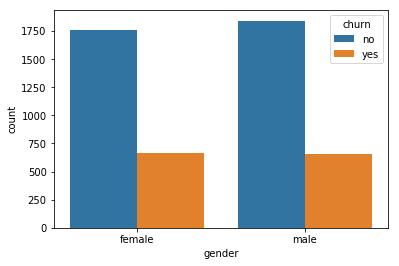

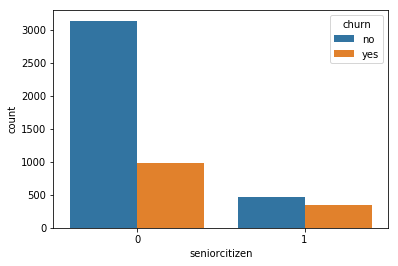

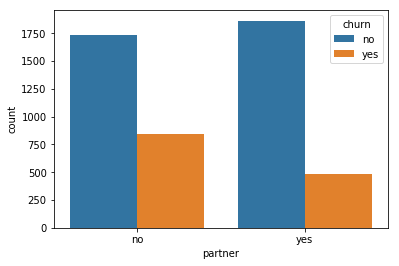

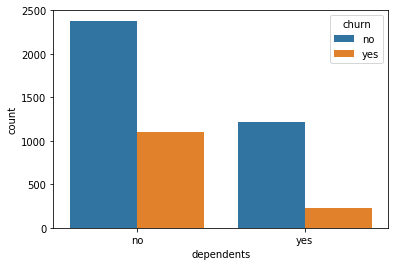

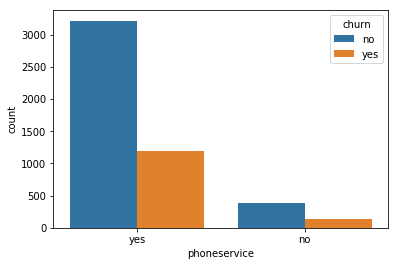

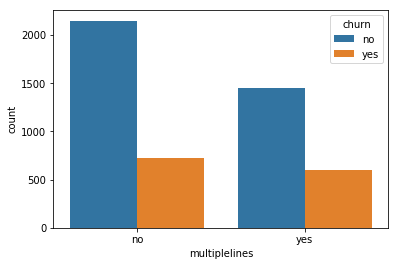

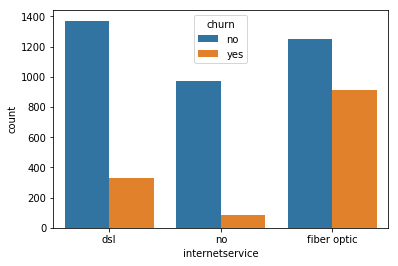

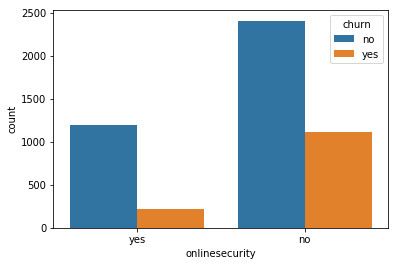

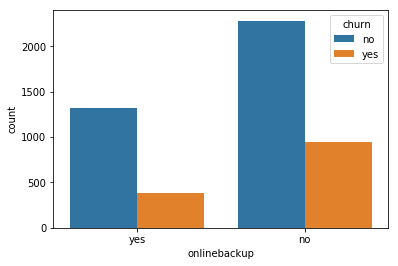

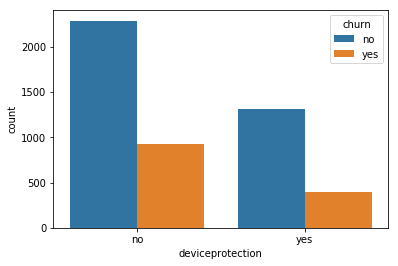

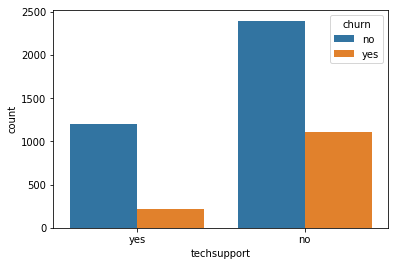

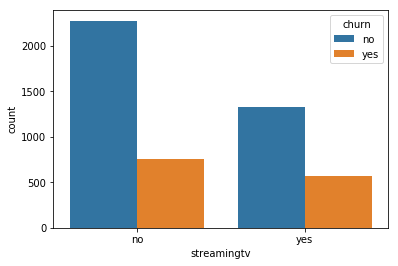

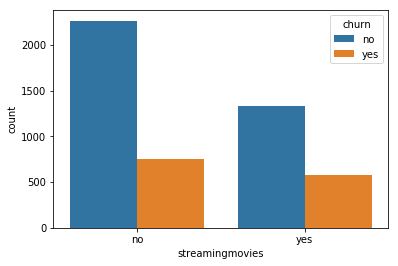

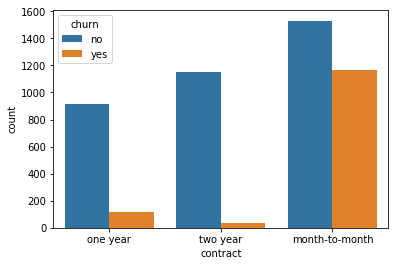

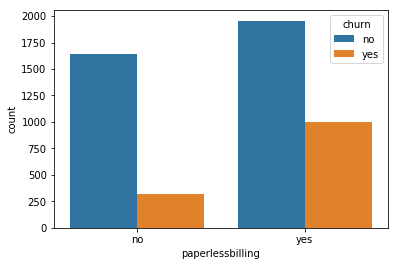

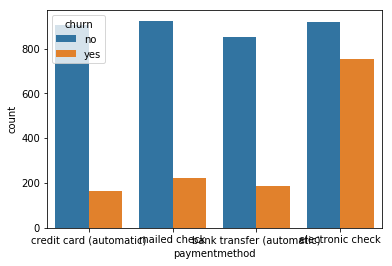

In [78]:
cat_features = [i for i in eda.columns if eda[i].nunique() < 10 and i != 'churn']
for feature in cat_features:
    sns.countplot(data=eda, x=feature, hue='churn')
    plt.show()

In [79]:
num_features = [i for i in eda.columns if eda[i].nunique() > 10 and i != 'churn']
num_features

['tenure', 'monthlycharges', 'totalcharges']

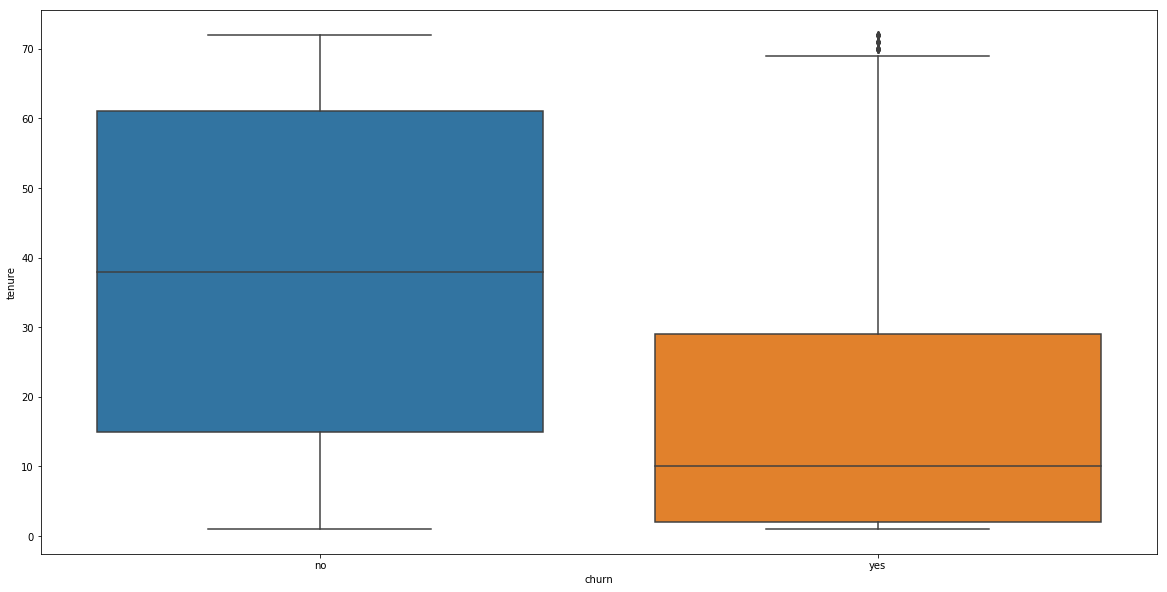

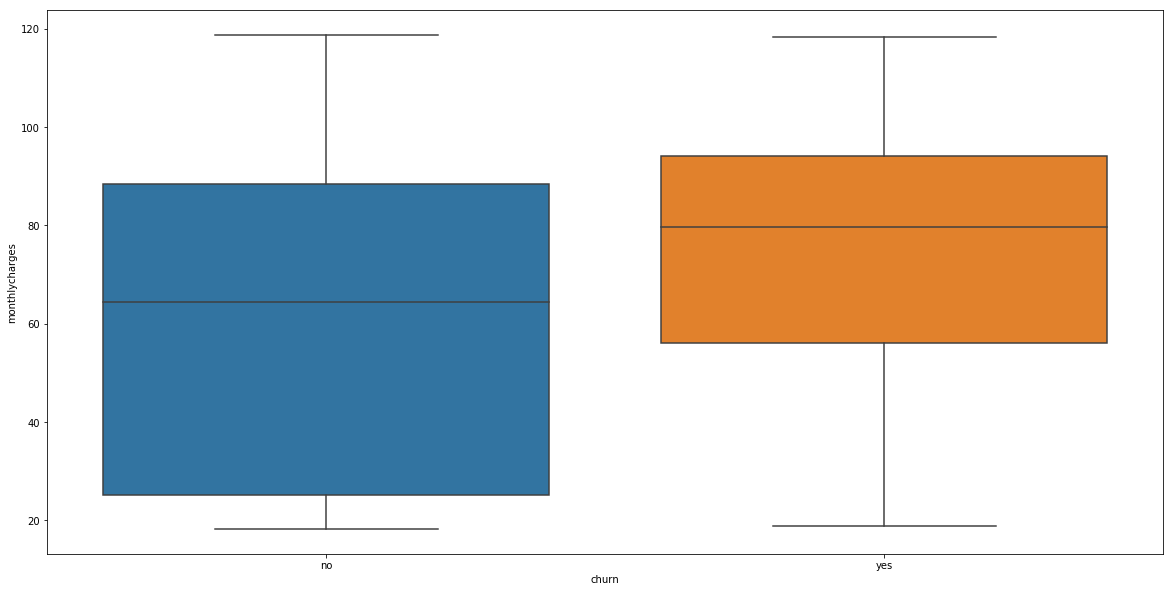

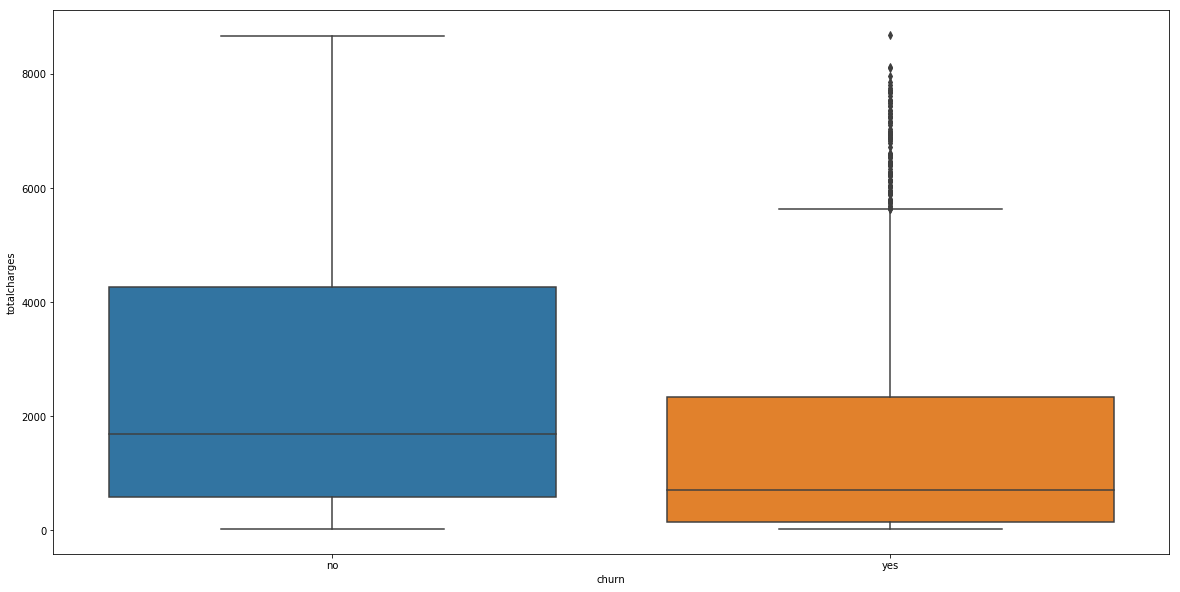

In [98]:
for feature in num_features:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=preproc, y=feature, x='churn')
    plt.show()

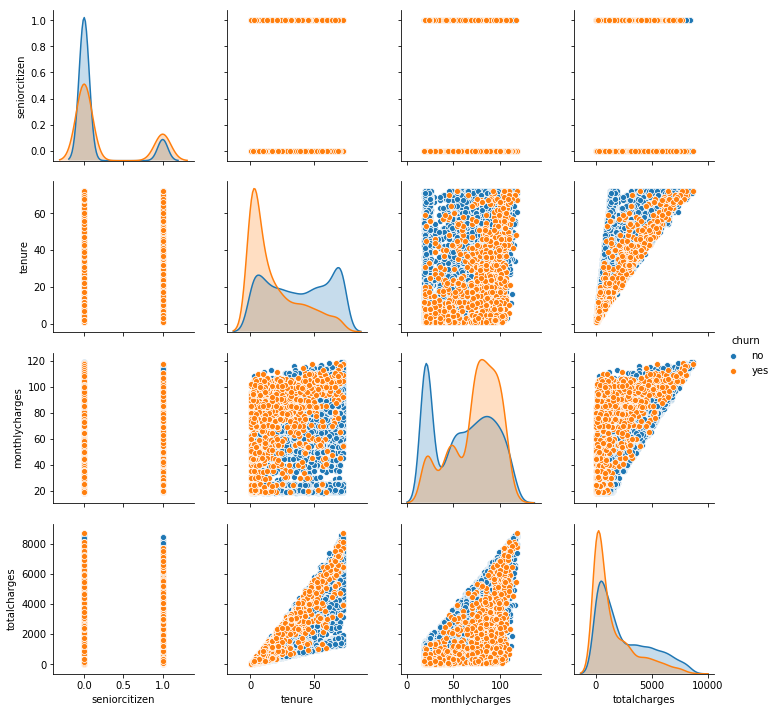

In [103]:
sns.pairplot(data=eda, hue='churn');

# Final preprocessing

In [132]:
f_preproc = eda.copy()

In [133]:
# drop de totalcharges = tenure*monthlycharges
f_preproc = f_preproc.drop('totalcharges', axis=1)
f_preproc.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,churn
4142,female,0,no,no,67,yes,no,dsl,yes,yes,no,yes,no,no,one year,no,credit card (automatic),60.50,no
974,female,0,yes,yes,59,yes,no,dsl,no,yes,no,yes,yes,yes,two year,yes,credit card (automatic),75.95,no
1488,male,0,no,no,1,yes,no,dsl,yes,no,no,no,no,no,month-to-month,no,mailed check,51.25,no
5505,female,0,yes,yes,12,no,no,dsl,no,no,no,yes,no,no,one year,no,credit card (automatic),30.25,no
676,female,0,no,no,48,yes,yes,no,no,no,no,no,no,no,one year,no,bank transfer (automatic),24.55,no


In [134]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
f_preproc.monthlycharges = std_scaler.fit_transform(f_preproc.monthlycharges.values.reshape(-1, 1))
f_preproc.tenure = std_scaler.fit_transform(f_preproc.tenure.values.reshape(-1, 1))
f_preproc[['tenure', 'monthlycharges']].head()

,tenure,monthlycharges
4142,1.411768,-0.137070
974,1.084293,0.375818
1488,-1.289896,-0.444140
5505,-0.839619,-1.141269
676,0.634016,-1.330490


In [135]:
f_preproc.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'churn'],
      dtype='object')

In [138]:
lab_features = [i for i in f_preproc.columns if f_preproc[i].nunique() == 2]
ohe_features = [i for i in f_preproc.columns if (f_preproc[i].nunique() > 2 and f_preproc[i].nunique() < 10)]

In [144]:
from sklearn.preprocessing import LabelEncoder

l_enc = LabelEncoder()
for feature in lab_features:
    f_preproc[feature] = l_enc.fit_transform(f_preproc[feature])
    
f_preproc.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,churn
4142,0,0,0,0,1.411768,1,0,dsl,1,1,0,1,0,0,one year,0,credit card (automatic),-0.137070,0
974,0,0,1,1,1.084293,1,0,dsl,0,1,0,1,1,1,two year,1,credit card (automatic),0.375818,0
1488,1,0,0,0,-1.289896,1,0,dsl,1,0,0,0,0,0,month-to-month,0,mailed check,-0.444140,0
5505,0,0,1,1,-0.839619,0,0,dsl,0,0,0,1,0,0,one year,0,credit card (automatic),-1.141269,0
676,0,0,0,0,0.634016,1,1,no,0,0,0,0,0,0,one year,0,bank transfer (automatic),-1.330490,0


In [158]:
f_preproc.contract = f_preproc.contract.str.replace(pat='-', repl='_').str.replace(pat=' ', repl='_')
f_preproc.paymentmethod = f_preproc.paymentmethod.str.replace(pat='(', repl='_').str.replace(pat=' ', repl='_').str.replace(pat=')', repl='')
f_preproc = pd.get_dummies(f_preproc, columns=['contract', 'internetservice', 'paymentmethod'])
f_preproc.head(20)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_month_to_month,contract_one_year,contract_two_year,internetservice_dsl,internetservice_fiber optic,internetservice_no,paymentmethod_bank_transfer__automatic,paymentmethod_credit_card__automatic,paymentmethod_electronic_check,paymentmethod_mailed_check
4142,0,0,0,0,1.411768,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
974,0,0,1,1,1.084293,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1488,1,0,0,0,-1.289896,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
5505,0,0,1,1,-0.839619,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
676,0,0,0,0,0.634016,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
775,0,0,1,0,1.616439,1,1,1,1,1,...,0,0,1,0,1,0,0,1,0,0
5881,0,0,0,0,0.060936,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
2320,1,0,1,1,1.248030,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0
3522,1,0,1,1,0.183739,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
5695,0,0,1,0,1.616439,1,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [159]:
f_preproc.dtypes

gender                                      int64
seniorcitizen                               int64
partner                                     int64
dependents                                  int64
tenure                                    float64
phoneservice                                int64
multiplelines                               int64
onlinesecurity                              int64
onlinebackup                                int64
deviceprotection                            int64
techsupport                                 int64
streamingtv                                 int64
streamingmovies                             int64
paperlessbilling                            int64
monthlycharges                            float64
churn                                       int64
contract_month_to_month                     uint8
contract_one_year                           uint8
contract_two_year                           uint8
internetservice_dsl                         uint8


# Mise en place d'un premier modèle : régression logistique

In [160]:
train = f_preproc.copy()

In [161]:
X_train = f_preproc.drop('churn', axis=1)
y_train = f_preproc.churn

In [181]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(C=1.0, n_jobs=-1)

In [182]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy').mean()

0.8006982018149909

In [183]:
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

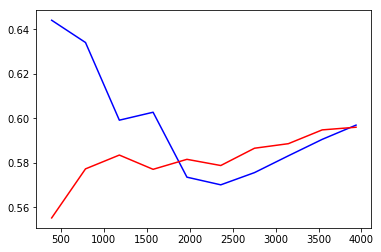

In [191]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(estimator=lreg, X=X_train, y=y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1, scoring='f1')
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'b')
plt.plot(train_sizes, val_scores_mean, 'r')
plt.show()

# Essai avec une RandomForest

In [198]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

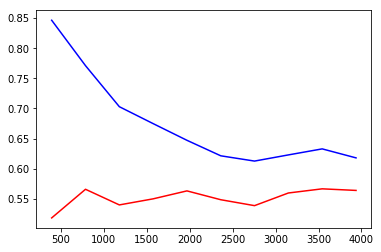

In [196]:
train_sizes, train_scores, val_scores = learning_curve(estimator=rf, X=X_train, y=y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1, scoring='f1')
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'b')
plt.plot(train_sizes, val_scores_mean, 'r')
plt.show()

In [240]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'max_depth': np.arange(5, 15),
    'max_features': np.arange(8, 16, 2),
    'min_samples_split': np.arange(10, 300, 20)
}

rnd_rf = RandomizedSearchCV(estimator=rf, cv=5, n_iter=100, n_jobs=-1, scoring='f1', param_distributions=rf_params)
rnd_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_features': array([ 8, 10, 12, 14]), 'min_samples_split': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [231]:
rnd_rf.best_score_

0.5809458241622015

In [204]:
best_rf = rnd_rf.best_estimator_
best_rf.feature_importances_

array([1.61669237e-04, 6.35683385e-03, 2.32404796e-03, 2.85672428e-04,
       2.35618901e-01, 1.78132627e-02, 3.80082341e-03, 1.12345213e-02,
       3.54745623e-03, 2.69358075e-03, 9.86261156e-03, 3.56429853e-03,
       1.23793305e-02, 1.14477768e-02, 7.16123046e-02, 3.64648265e-01,
       8.57374301e-03, 3.44059027e-02, 2.79370437e-03, 1.43777086e-01,
       2.07115513e-03, 2.94246063e-03, 2.07071294e-03, 4.37450250e-02,
       2.26885468e-03])

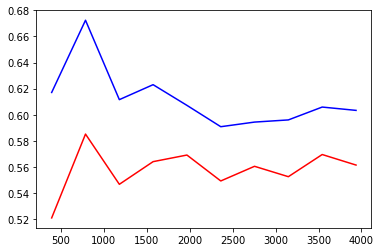

In [249]:
train_sizes, train_scores, val_scores = learning_curve(estimator=best_rf, X=X_train, y=y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1, scoring='f1')
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'b')
plt.plot(train_sizes, val_scores_mean, 'r')
plt.show()

# SVC

In [261]:
from sklearn.svm import SVC

svc = SVC(C=1.0, gamma=0.1, kernel='rbf')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [262]:
confusion_matrix(y_true=y_train, y_pred=svc.predict(X_train))

array([[3306,  293],
       [ 632,  691]], dtype=int64)

In [263]:
from sklearn.metrics import f1_score

f1_score(y_true=y_train, y_pred=svc.predict(X_train))

0.599046380580841

In [265]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

svc_params = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.5, 1.0, 10.0],
    'degree': [3, 4, 5]
}

g_svc = GridSearchCV(estimator=svc, cv=5, n_jobs=-1, param_grid=svc_params, scoring='f1')
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.5, 1.0, 10.0], 'degree': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [266]:
g_svc.best_score_

0.5768969967371639

In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

best_svc = g_svc.best_estimator_
accuracy_score(y_true=y_train, y_pred=best_svc.predict(X_train))

0.8108492482730597

# PCA

In [313]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_pca.merge()

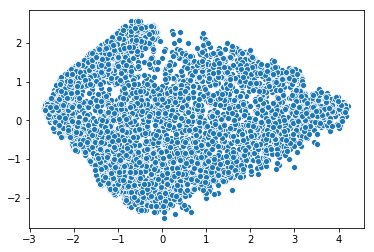

In [322]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])

In [324]:
pca_tot = PCA()
pca_tot.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [341]:
np.cumsum(pca_tot.explained_variance_ratio_)

array([0.36891918, 0.5358568 , 0.59673225, 0.63379854, 0.66831113,
       0.70076256, 0.73129142, 0.75909807, 0.78651062, 0.81216222,
       0.83616995, 0.85723737, 0.87771869, 0.89659724, 0.91417841,
       0.93062798, 0.94644677, 0.9611395 , 0.97373418, 0.98456611,
       0.99324308, 0.99995279, 1.        , 1.        , 1.        ,
       1.        ])